In [2]:
import hail as hl
import pandas as pd

In [2]:
import hail
hail.__version__

In [3]:
# file matching OneK1K IDs to CPG (internal) and TOB (external) IDs 
myfile = 'gs://cpg-tob-wgs-test/scrna-seq/grch38_association_files/OneK1K_CPG_IDs.tsv'
my_df = pd.read_csv(myfile, sep='\t', index_col=0)
my_df.head()

,InternalID,ExternalID
OneK1K_ID,,
926_927,CPG9787,TOB1801
930_931,CPG9829,TOB1805
946_947,CPG9985,TOB1821
943_944,CPG9951,TOB1818
947_948,CPG9993,TOB1822


In [4]:
my_df[my_df['ExternalID']=='TOB1142']

,InternalID,ExternalID
OneK1K_ID,,
1048_1049,CPG10975,TOB1142


In [5]:
my_df[my_df['ExternalID']=='TOB1133']

,InternalID,ExternalID
OneK1K_ID,,
324_325,CPG3772,TOB1133


In [ ]:
CPG_ID = my_df[my_df.index == '926_927']['InternalID'].values[0]
CPG_ID

In [25]:
CPG_ID = my_df[my_df.index == '926_927']['InternalID'].values[0]
CPG_ID

'CPG9787'

In [26]:
mt = hl.read_matrix_table('gs://cpg-tob-wgs-test/tob_wgs_vep/v1/vep105_GRCh38.mt')

Initializing Hail with default parameters...


2022-08-18 01:25:11 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2022-08-18 01:25:12 WARN  Hail:43 - This Hail JAR was compiled for Spark 3.1.3, running with Spark 3.1.2.
  Compatibility is not guaranteed.


Running on Apache Spark version 3.1.2
SparkUI available at http://annas-notebook.australia-southeast1-a.c.notebooks-314505.internal:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.97-937922d7f46c
LOGGING: writing to /home/jupyter/hail-20220818-0125-0.2.97-937922d7f46c.log


In [ ]:
donor_mt = mt.filter_cols(mt.s == cpg_id)

In [30]:
gene_file = 'gs://cpg-tob-wgs-main/scrna-seq/grch38_association_files/gene_location_files/GRCh38_geneloc_chr22.tsv'
gene_df = pd.read_csv(gene_file, sep='\t', index_col=0)
gene_df.head()

,gene_name,chr,start,end,strand
gene_id,,,,,
ENSG00000277248.1,U2,chr22,10736171,10736283,-
ENSG00000283047.1,FRG1FP,chr22,10939388,10961338,-
ENSG00000279973.2,SC22CB-56B3.1,chr22,11066418,11068174,+
ENSG00000226444.2,ACTR3BP7,chr22,11124337,11125705,+
ENSG00000276871.1,5_8S_rRNA,chr22,11249809,11249959,-


In [31]:
gene_df[gene_df['gene_name'] == "VPREB3"]

,gene_name,chr,start,end,strand
gene_id,,,,,
ENSG00000128218.8,VPREB3,chr22,23752743,23754425,-


In [ ]:
chr22:23744425-23762743

In [6]:
mt = hl.read_matrix_table('gs://cpg-tob-wgs-test/tob_wgs_vep/v1/vep105_GRCh38.mt')

Initializing Hail with default parameters...


2022-08-16 06:40:27 WARN  NativeCodeLoader:60 - Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


2022-08-16 06:40:28 WARN  Hail:43 - This Hail JAR was compiled for Spark 3.1.3, running with Spark 3.1.2.
  Compatibility is not guaranteed.


Running on Apache Spark version 3.1.2
SparkUI available at http://annas-notebook.australia-southeast1-a.c.notebooks-314505.internal:4040
Welcome to
     __  __     <>__
    / /_/ /__  __/ /
   / __  / _ `/ / /
  /_/ /_/\_,_/_/_/   version 0.2.97-937922d7f46c
LOGGING: writing to /home/jupyter/hail-20220816-0640-0.2.97-937922d7f46c.log


In [4]:
mt.count()

(77899783, 1061)

In [5]:
# genetic variants (defined by position (locus) and alleles (reference, alternative or viceversa?))
mt.rows().select().show(5)

,
locus,alleles
locus<GRCh38>,array<str>
chr1:10011,"[""C"",""T""]"
chr1:10020,"[""A"",""C""]"
chr1:10027,"[""A"",""G""]"
chr1:10109,"[""AACCCT"",""A""]"
chr1:10114,"[""T"",""C""]"


In [6]:
# individual IDs (CPG ones, see key above to match to the scRNA-seq ones)
mt.s.show(5)

""
s
str
"""CPG18"""
"""CPG26"""
"""CPG34"""
"""CPG42"""
"""CPG59"""


In [7]:
mt.col.show()

+----------+----------------+--------------------+-------------------+
| s        | meta.is_female | meta.chr20_mean_dp | meta.chrX_mean_dp |
+----------+----------------+--------------------+-------------------+
| str      |           bool |            float64 |           float64 |
+----------+----------------+--------------------+-------------------+
| "CPG18"  |           True |           3.50e+01 |          3.19e+01 |
| "CPG26"  |           True |           3.78e+01 |          3.47e+01 |
| "CPG34"  |          False |           3.66e+01 |          1.71e+01 |
| "CPG42"  |           True |           4.20e+01 |          3.84e+01 |
| "CPG59"  |           True |           3.80e+01 |          3.48e+01 |
| "CPG67"  |           True |           4.86e+01 |          4.31e+01 |
| "CPG75"  |          False |           3.83e+01 |          1.78e+01 |
| "CPG83"  |          False |           3.72e+01 |          1.74e+01 |
| "CPG91"  |          False |           3.53e+01 |          1.66e+01 |
| "CPG109" |          False |           3.41e+01 |          1.59e+01 |
+----------+----------------+--------------------+-------------------+

+-------------------+------------------+------------------+------------------+
| meta.chrY_mean_dp | meta.chrX_ploidy | meta.chrY_ploidy | meta.X_karyotype |
+-------------------+------------------+------------------+------------------+
|           float64 |          float64 |          float64 | str              |
+-------------------+------------------+------------------+------------------+
|          1.45e+00 |         1.82e+00 |         8.31e-02 | "XX"             |
|          1.31e+00 |         1.83e+00 |         6.93e-02 | "XX"             |
|          1.38e+01 |         9.34e-01 |         7.56e-01 | "X"              |
|          1.25e+00 |         1.83e+00 |         5.95e-02 | "XX"             |
|          9.06e-01 |         1.83e+00 |         4.77e-02 | "XX"             |
|          1.16e+00 |         1.77e+00 |         4.80e-02 | "XX"             |
|          1.16e+01 |         9.27e-01 |         6.06e-01 | "X"              |
|          1.17e+01 |         9.38e-01 |         6.31e-01 | "X"              |
|          1.24e+01 |         9.41e-01 |         7.05e-01 | "X"              |
|          1.02e+01 |         9.34e-01 |         6.01e-01 | "X"              |
+-------------------+------------------+------------------+------------------+

+------------------+--------------------+------------------------------+
| meta.Y_karyotype | meta.sex_karyotype | meta.impute_sex_stats.f_stat |
+------------------+--------------------+------------------------------+
| str              | str                |                      float64 |
+------------------+--------------------+------------------------------+
| ""               | "XX"               |                    -7.57e-01 |
| ""               | "XX"               |                    -8.76e-01 |
| "Y"              | "XY"               |                     8.43e-01 |
| ""               | "XX"               |                    -8.02e-01 |
| ""               | "XX"               |                    -8.54e-01 |
| ""               | "XX"               |                    -8.93e-01 |
| "Y"              | "XY"               |                     8.09e-01 |
| "Y"              | "XY"               |                     8.04e-01 |
| "Y"              | "XY"               |                     8.56e-01 |
| "Y"              | "XY"               |                     8.27e-01 |
+------------------+--------------------+------------------------------+

+--------------------------------+-------------------------------------+
| meta.impute_sex_stats.n_called | meta.impute_sex_stats.expected_homs |
+--------------------------------+-------------------------------------+
|                          int64 |                             float64 |
+--------------------------------+-------------------------------------+
|                         137958 |                            1.

In [8]:
# 'CPG9951' (943_944) is an expression outlier for gene: 'IGLL5'

In [9]:
# option: figuring out window around gene
# from this file on Garvan HPC: /share/ScratchGeneral/anncuo/OneK1K/GeneLocations.tsv
# the row corresposnding to IGLL5 looks like this:
# gene_name  gene_id          seqid  start     end       strand
# IGLL5      ENSG00000254709  22     23229960  23238287  +
# so adding 10kb upstream and downstream, i get the interval: 23,229,960 - 10,000 : 23,238,287 + 10,000: 22:23219960-23348287

In [6]:
ds_result = hl.filter_intervals(mt, [hl.parse_locus_interval('chr22:23219960-23348287', reference_genome='GRCh38')])

In [11]:
ds_result.count()

(3519, 1061)

In [69]:
ds_result = hl.variant_qc(ds_result)
ds_result_noref = ds_result.filter_rows(ds_result.row_key[0] in relevant_variants)

TypeError: `LocusExpression` objects don't support the `in` operator.

In [62]:
ds_result.row_key[0]

<LocusExpression of type locus<GRCh38>>

In [57]:
relevant_variants[0:5]

[Locus(contig=chr22, position=23223094, reference_genome=GRCh38),
 Locus(contig=chr22, position=23223832, reference_genome=GRCh38),
 Locus(contig=chr22, position=23223894, reference_genome=GRCh38),
 Locus(contig=chr22, position=23225377, reference_genome=GRCh38),
 Locus(contig=chr22, position=23225874, reference_genome=GRCh38)]

In [39]:
ds_result_noref.count()

(2960, 1061)

In [34]:
maf_list = ds_result_noref.variant_qc.AF[1].collect()

In [37]:
maf_list0 = [1-i if i >= 0.5 else i for i in maf_list]

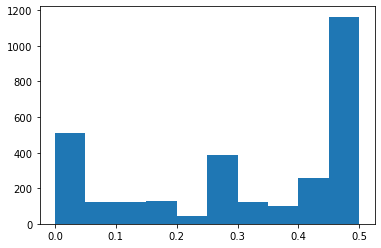

In [38]:
# plt.hist(maf_list)
plt.hist(maf_list0)
plt.show()

In [12]:
ds_result.vep.show()

+----------------+------------+-------------------+-------------------+
| locus          | alleles    | vep.assembly_name | vep.allele_string |
+----------------+------------+-------------------+-------------------+
| locus<GRCh38>  | array<str> | str               | str               |
+----------------+------------+-------------------+-------------------+
| chr22:23220004 | ["A","G"]  | "GRCh38"          | "A/G"             |
| chr22:23220166 | ["G","T"]  | "GRCh38"          | "G/T"             |
| chr22:23220186 | ["T","C"]  | "GRCh38"          | "T/C"             |
| chr22:23220195 | ["A","T"]  | "GRCh38"          | "A/T"             |
| chr22:23220257 | ["T","C"]  | "GRCh38"          | "T/C"             |
| chr22:23220273 | ["T","C"]  | "GRCh38"          | "T/C"             |
| chr22:23220328 | ["G","T"]  | "GRCh38"          | "G/T"             |
| chr22:23220341 | ["T","C"]  | "GRCh38"          | "T/C"             |
| chr22:23220526 | ["T","C"]  | "GRCh38"          | "T/C"             |
| chr22:23220574 | ["C","T"]  | "GRCh38"          | "C/T"             |
+----------------+------------+-------------------+-------------------+

+---------------+
| vep.ancestral |
+---------------+
| str           |
+---------------+
| NA            |
| NA            |
| NA            |
| NA            |
| NA            |
| NA            |
| NA            |
| NA            |
| NA            |
| NA            |
+---------------+

+------------------------------------------------------------------------------+
| vep.colocated_variants                                                       |
+------------------------------------------------------------------------------+
| array<struct{aa_allele: str, aa_maf: float64, afr_allele: str, afr_maf: f... |
+------------------------------------------------------------------------------+
| [(NA,NA,NA,NA,"A/G",NA,NA,NA,23220004,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA... |
| [(NA,NA,NA,NA,"G/T",NA,NA,NA,23220166,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA... |
| NA                                                                           |
| [(NA,NA,NA,NA,"A/T",NA,NA,NA,23220195,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA... |
| [(NA,NA,NA,NA,"T/C",NA,NA,NA,23220257,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA... |
| NA                                                                           |
| [(NA,NA,NA,NA,"COSMIC_MUTATION",NA,NA,NA,23220328,NA,NA,NA,NA,NA,NA,NA,NA... |
| [(NA,NA,NA,NA,"T/C",NA,NA,NA,23220341,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA... |
| [(NA,NA,NA,NA,"T/C",NA,NA,NA,23220526,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA... |
| [(NA,NA,NA,NA,"C/T",NA,NA,NA,23220574,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA... |
+------------------------------------------------------------------------------+

+-------------+----------+--------+-------------------------------+
| vep.context |  vep.end | vep.id | vep.input                     |
+-------------+----------+--------+-------------------------------+
| str         |    int32 | str    | str                           |
+-------------+----------+--------+-------------------------------+
| NA          | 23220004 | "."    | "chr22	23220004	.	A	G	.	.	GT" |
| NA          | 23220166 | "."    | "chr22	23220166	.	G	T	.	.	GT" |
| NA          | 23220186 | "."    | "chr22	23220186	.	T	C	.	.	GT" |
| NA          | 23220195 | "."    | "chr22	23220195	.	A	T	.	.	GT" |
| NA          | 23220257 | "."    | "chr22	23220257	.	T	C	.	.	GT" |
| NA          | 23220273 | "."    | "chr22	23220273	.	T	C	.	.	GT" |
| NA          | 23220328 | "."    | "chr22	23220328	.	G	T	.	.	GT" |
| NA          | 23220341 | "."    | "chr22	23220341	.	T	C	.	.	GT" |
| NA          | 23220526 | "."    | "chr22	23220526	.	T	C	.	.	GT" |
| NA          | 23220574 | "."    | "chr22	23220574	.	C	T	.	.	GT" |
+-------------+----------+--------+-------------------------------+

+------------------------------------------------------------------------------+
| vep.intergenic_consequences                                                  |
+---------

In [7]:
# select just one donor 
donor_mt = ds_result.filter_cols(ds_result.s == 'CPG9951')
donor_mt.count()

(3519, 1)

In [8]:
donor_mt = mt.filter_cols(mt.s == 'CPG9951')
donor_mt_rsid = donor_mt.filter_rows(hl.len(donor_mt.rsid) > 0)
donor_mt_rsid.rsid.show()

,,
locus,alleles,rsid
locus<GRCh38>,array<str>,str


In [14]:
# entries contains row data, then column data, then intersection (rows by columns)
donor_mt.entries().show()

2022-08-12 02:41:55 Hail: WARN: entries(): Resulting entries table is sorted by '(row_key, col_key)'.
    To preserve row-major matrix table order, first unkey columns with 'key_cols_by()'


+----------------+-------------------+------+-------------------+------------+
| locus          | alleles           | rsid | n_unsplit_alleles | mixed_site |
+----------------+-------------------+------+-------------------+------------+
| locus<GRCh38>  | array<str>        | str  |             int32 |       bool |
+----------------+-------------------+------+-------------------+------------+
| chr22:23223094 | ["C","T"]         | NA   |                 2 |      False |
| chr22:23223832 | ["C","G"]         | NA   |                 3 |      False |
| chr22:23223832 | ["C","T"]         | NA   |                 3 |      False |
| chr22:23223894 | ["A","C"]         | NA   |                 4 |      False |
| chr22:23223894 | ["A","G"]         | NA   |                 4 |      False |
| chr22:23223894 | ["A","T"]         | NA   |                 4 |      False |
| chr22:23225377 | ["C","CCCGG"]     | NA   |                 5 |      False |
| chr22:23225377 | ["C","CCCTA"]     | NA   |                 5 |      False |
| chr22:23225377 | ["C","CCCTG"]     | NA   |                 5 |      False |
| chr22:23225377 | ["C","CCCTGCCTG"] | NA   |                 5 |      False |
+----------------+-------------------+------+-------------------+------------+

+---------+-----------+-----------+----------+-------------+--------------+
| a_index | was_split |      qual | filters  | allele_type | AS_MQRankSum |
+---------+-----------+-----------+----------+-------------+--------------+
|   int32 |      bool |   float64 | set<str> | str         |      float64 |
+---------+-----------+-----------+----------+-------------+--------------+
|       1 |     False | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|      NA |        NA |        NA | NA       | NA          |           NA |
|       2 |      True | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|      NA |        NA |        NA | NA       | NA          |           NA |
|       2 |      True | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|      NA |        NA |        NA | NA       | NA          |           NA |
|      NA |        NA |        NA | NA       | NA          |           NA |
|      NA |        NA |        NA | NA       | NA          |           NA |
|       3 |      True | -1.00e+01 | {}       | "ins"       |     0.00e+00 |
|      NA |        NA |        NA | NA       | NA          |           NA |
+---------+-----------+-----------+----------+-------------+--------------+

+------------+----------+-------------------+----------+---------------+
| AS_pab_max |    AS_QD | AS_ReadPosRankSum |   AS_SOR | n_alt_alleles |
+------------+----------+-------------------+----------+---------------+
|    float64 |  float64 |           float64 |  float64 |         int32 |
+------------+----------+-------------------+----------+---------------+
|   1.00e+00 | 1.35e+01 |         -4.50e-02 | 8.49e-01 |             1 |
|         NA |       NA |                NA |       NA |            NA |
|   1.00e+00 | 2.21e+01 |         -2.10e-02 | 6.85e-01 |             2 |
|         NA |       NA |                NA |       NA |            NA |
|   1.00e+00 | 2.24e+01 |          2.50e-02 | 7.06e-01 |             3 |
|         NA |       NA |                NA |       NA |            NA |
|         NA |       NA |                NA |       NA |            NA |
|         NA |       NA |                NA |       NA |            NA |
|         NA | 4.59e+01 |          1.17e+00 | 2.03e-01 |             4 |
|         NA |       NA |                NA |       NA |            NA |
+------------+----------+-------------------+----------+---------------+

+---------------+--------+------+-------+---------------+-------------------+
| variant_type  | hapmap | omni | mills | kgp_phase1_hc | fail_hard_filters |
+---------------+--------+------+-------+---------------+-------------------+
| str           |   bool | bool |  bool |          bool |              bool |
+---------------+--------+------+----

In [8]:
# remove variants for which this individual is 0/0
donor_mt = hl.variant_qc(donor_mt)
donor_mt_noref = donor_mt.filter_rows(donor_mt.variant_qc.n_non_ref > 0)

In [17]:
donor_mt_noref.count()

(342, 1)

In [18]:
donor_mt_noref.entries().show()

+----------------+-------------------+------+-------------------+------------+
| locus          | alleles           | rsid | n_unsplit_alleles | mixed_site |
+----------------+-------------------+------+-------------------+------------+
| locus<GRCh38>  | array<str>        | str  |             int32 |       bool |
+----------------+-------------------+------+-------------------+------------+
| chr22:23223094 | ["C","T"]         | NA   |                 2 |      False |
| chr22:23223832 | ["C","T"]         | NA   |                 3 |      False |
| chr22:23223894 | ["A","G"]         | NA   |                 4 |      False |
| chr22:23225377 | ["C","CCCTG"]     | NA   |                 5 |      False |
| chr22:23225874 | ["C","T"]         | NA   |                 2 |      False |
| chr22:23226321 | ["AGAGAGAGT","A"] | NA   |                 5 |      False |
| chr22:23226671 | ["A","G"]         | NA   |                 3 |      False |
| chr22:23226876 | ["G","A"]         | NA   |                 2 |      False |
| chr22:23227024 | ["A","G"]         | NA   |                 2 |      False |
| chr22:23229596 | ["G","C"]         | NA   |                 2 |      False |
+----------------+-------------------+------+-------------------+------------+

+---------+-----------+-----------+----------+-------------+--------------+
| a_index | was_split |      qual | filters  | allele_type | AS_MQRankSum |
+---------+-----------+-----------+----------+-------------+--------------+
|   int32 |      bool |   float64 | set<str> | str         |      float64 |
+---------+-----------+-----------+----------+-------------+--------------+
|       1 |     False | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       2 |      True | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       2 |      True | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       3 |      True | -1.00e+01 | {}       | "ins"       |     0.00e+00 |
|       1 |     False | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       4 |      True | -1.00e+01 | {}       | "del"       |     0.00e+00 |
|       1 |      True | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       1 |     False | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       1 |     False | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       1 |     False | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
+---------+-----------+-----------+----------+-------------+--------------+

+------------+----------+-------------------+----------+---------------+
| AS_pab_max |    AS_QD | AS_ReadPosRankSum |   AS_SOR | n_alt_alleles |
+------------+----------+-------------------+----------+---------------+
|    float64 |  float64 |           float64 |  float64 |         int32 |
+------------+----------+-------------------+----------+---------------+
|   1.00e+00 | 1.35e+01 |         -4.50e-02 | 8.49e-01 |             1 |
|   1.00e+00 | 2.21e+01 |         -2.10e-02 | 6.85e-01 |             2 |
|   1.00e+00 | 2.24e+01 |          2.50e-02 | 7.06e-01 |             3 |
|         NA | 4.59e+01 |          1.17e+00 | 2.03e-01 |             4 |
|   1.00e+00 | 2.21e+01 |         -8.60e-02 | 6.86e-01 |             1 |
|   1.00e+00 | 1.82e+01 |          1.18e+00 | 6.98e-01 |             3 |
|   1.00e+00 | 2.20e+01 |          3.90e-02 | 6.89e-01 |             2 |
|   1.00e+00 | 2.20e+01 |         -5.30e-02 | 7.08e-01 |             1 |
|   1.00e+00 | 1.73e+01 |          2.20e-02 | 6.33e-01 |             1 |
|   1.00e+00 | 2.21e+01 |          1.30e-02 | 7.11e-01 |             1 |
+------------+----------+-------------------+----------+---------------+

+---------------+--------+------+-------+---------------+-------------------+
| variant_type  | hapmap | omni | mills | kgp_phase1_hc | fail_hard_filters |
+---------------+--------+------+-------+---------------+-------------------+
| str           |   bool | bool |  bool |          bool |              bool |
+---------------+--------+------+----

In [19]:
# filter to only variants with some regulatory consequences
donor_mt_reg = donor_mt_noref.filter_rows(hl.len(donor_mt_noref.vep.regulatory_feature_consequences) > 0)
donor_mt_reg.count()

(132, 1)

In [20]:
donor_mt_reg.vep.show()

+----------------+------------------------------+-------------------+
| locus          | alleles                      | vep.assembly_name |
+----------------+------------------------------+-------------------+
| locus<GRCh38>  | array<str>                   | str               |
+----------------+------------------------------+-------------------+
| chr22:23241440 | ["C","T"]                    | "GRCh38"          |
| chr22:23242243 | ["C","G"]                    | "GRCh38"          |
| chr22:23242945 | ["A","G"]                    | "GRCh38"          |
| chr22:23250864 | ["G","A"]                    | "GRCh38"          |
| chr22:23253570 | ["C","T"]                    | "GRCh38"          |
| chr22:23257682 | ["G","A"]                    | "GRCh38"          |
| chr22:23257826 | ["G","A"]                    | "GRCh38"          |
| chr22:23261770 | ["T","G"]                    | "GRCh38"          |
| chr22:23261789 | ["G","A"]                    | "GRCh38"          |
| chr22:23262087 | ["ACGCCATCACACCCTGTGTG","A"] | "GRCh38"          |
+----------------+------------------------------+-------------------+

+-------------------------+---------------+
| vep.allele_string       | vep.ancestral |
+-------------------------+---------------+
| str                     | str           |
+-------------------------+---------------+
| "C/T"                   | NA            |
| "C/G"                   | NA            |
| "A/G"                   | NA            |
| "G/A"                   | NA            |
| "C/T"                   | NA            |
| "G/A"                   | NA            |
| "G/A"                   | NA            |
| "T/G"                   | NA            |
| "G/A"                   | NA            |
| "CGCCATCACACCCTGTGTG/-" | NA            |
+-------------------------+---------------+

+------------------------------------------------------------------------------+
| vep.colocated_variants                                                       |
+------------------------------------------------------------------------------+
| array<struct{aa_allele: str, aa_maf: float64, afr_allele: str, afr_maf: f... |
+------------------------------------------------------------------------------+
| [(NA,NA,NA,NA,"C/G/T",NA,NA,NA,23241440,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,... |
| [(NA,NA,NA,NA,"COSMIC_MUTATION",NA,NA,NA,23242243,NA,NA,NA,NA,NA,NA,NA,NA... |
| [(NA,NA,NA,NA,"A/G/T",NA,NA,NA,23242945,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,... |
| [(NA,NA,NA,NA,"G/A/C",NA,NA,NA,23250864,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,... |
| [(NA,NA,NA,NA,"C/T",NA,NA,NA,23253570,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA... |
| [(NA,NA,NA,NA,"G/A",NA,NA,NA,23257682,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA... |
| [(NA,NA,NA,NA,"G/A",NA,NA,NA,23257826,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA... |
| [(NA,NA,NA,NA,"T/G",NA,NA,NA,23261770,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA... |
| [(NA,NA,NA,NA,"G/A",NA,NA,NA,23261789,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA... |
| [(NA,NA,NA,NA,"CGCCATCACACCCTGTGTGCGCCATCACACCCTGTGTGC/C/CGCCATCACACCCTGT... |
+------------------------------------------------------------------------------+

+-------------+----------+--------+
| vep.context |  vep.end | vep.id |
+-------------+----------+--------+
| str         |    int32 | str    |
+-------------+----------+--------+
| NA          | 23241440 | "."    |
| NA          | 23242243 | "."    |
| NA          | 23242945 | "."    |
| NA          | 23250864 | "."    |
| NA          | 23253570 | "."    |
| NA          | 23257682 | "."    |
| NA          | 23257826 | "."    |
| NA          | 23261770 | "."    |
| NA          | 23261789 | "."    |
| NA          | 23262106 | "."    |
+-------------+----------+--------+

+--------------------------------------------------+
| vep.input                                        |
+--------------------------------------------------+
| str                                              |
+--------------------------------------------------+
| "chr22	23241440	.	C	T	.	.	GT"    

In [17]:
donor_mt = hl.variant_qc(donor_mt)
donor_mt = donor_mt.filter_rows(donor_mt.variant_qc.n_non_ref > 0)

In [19]:
donor_mt = donor_mt.filter_rows(hl.len(donor_mt.vep.regulatory_feature_consequences) > 0)
donor_mt.vep.regulatory_feature_consequences[0].show(150)

+---------------+---------------+-------------------+
| locus         | alleles       | <expr>.allele_num |
+---------------+---------------+-------------------+
| locus<GRCh38> | array<str>    |             int32 |
+---------------+---------------+-------------------+
| chr1:12807    | ["C","T"]     |                 1 |
| chr1:13079    | ["C","G"]     |                 1 |
| chr1:13418    | ["G","A"]     |                 1 |
| chr1:13912    | ["G","A"]     |                 1 |
| chr1:14165    | ["A","G"]     |                 1 |
| chr1:14248    | ["T","G"]     |                 1 |
| chr1:14354    | ["C","A"]     |                 1 |
| chr1:14590    | ["G","A"]     |                 1 |
| chr1:14599    | ["T","A"]     |                 1 |
| chr1:14604    | ["A","G"]     |                 1 |
| chr1:14610    | ["T","C"]     |                 1 |
| chr1:14653    | ["C","T"]     |                 1 |
| chr1:14699    | ["C","G"]     |                 1 |
| chr1:14907    | ["A","G"]     |                 1 |
| chr1:14930    | ["A","G"]     |                 1 |
| chr1:15045    | ["C","T"]     |                 1 |
| chr1:15094    | ["A","G"]     |                 1 |
| chr1:15118    | ["A","G"]     |                 1 |
| chr1:15211    | ["T","G"]     |                 1 |
| chr1:15274    | ["A","T"]     |                 1 |
| chr1:16103    | ["T","G"]     |                 1 |
| chr1:16125    | ["T","G"]     |                 1 |
| chr1:16257    | ["G","C"]     |                 1 |
| chr1:16288    | ["C","G"]     |                 1 |
| chr1:16298    | ["C","T"]     |                 1 |
| chr1:16378    | ["T","C"]     |                 1 |
| chr1:16495    | ["G","C"]     |                 1 |
| chr1:16534    | ["C","T"]     |                 1 |
| chr1:16571    | ["G","A"]     |                 1 |
| chr1:28198    | ["A","T"]     |                 1 |
| chr1:28251    | ["T","C"]     |                 1 |
| chr1:28254    | ["T","C"]     |                 1 |
| chr1:28563    | ["A","G"]     |                 1 |
| chr1:28591    | ["T","TGG"]   |                 1 |
| chr1:28863    | ["C","A"]     |                 1 |
| chr1:28905    | ["C","A"]     |                 1 |
| chr1:29571    | ["G","C"]     |                 1 |
| chr1:39015    | ["A","C"]     |                 1 |
| chr1:39203    | ["C","T"]     |                 1 |
| chr1:39256    | ["A","G"]     |                 1 |
| chr1:39261    | ["T","C"]     |                 1 |
| chr1:39406    | ["G","C"]     |                 1 |
| chr1:39578    | ["C","T"]     |                 1 |
| chr1:102664   | ["A","G"]     |                 1 |
| chr1:103756   | ["G","T"]     |                 1 |
| chr1:104033   | ["T","C"]     |                 1 |
| chr1:104108   | ["A","G"]     |                 1 |
| chr1:104160   | ["A","AACAC"] |                 1 |
| chr1:104194   | ["C","A"]     |                 1 |
| chr1:104320   | ["T","C"]     |                 1 |
| chr1:104326   | ["A","G"]     |                 1 |
| chr1:104411   | ["G","A"]     |                 1 |
| chr1:104697   | ["G","T"]     |                 1 |
| chr1:104698   | ["C","T"]     |                 1 |
| chr1:104720   | ["C","T"]     |                 1 |
| chr1:104942   | ["C","G"]     |                 1 |
| chr1:105181   | ["C","T"]     |                 1 |
| chr1:105194   | ["C","T"]     |                 1 |
| chr1:105195   | ["G","A"]     |                 1 |
| chr1:105221   | ["T","C"]     |                 1 |
| chr1:105279   | ["G","C"]     |                 1 |
| chr1:132782   | ["G","A"]     |                 1 |
| chr1:134266   | ["G","A"]     |                 1 |
| chr1:135040   | ["T","C"]     |                 1 |
| chr1:138156   | ["G","T"]     |                 1 |
| chr1:138593   | ["G","T"]     |                 1 |
| chr1:139058   | ["C","G"]     |                 1 |
| chr1:139213   | ["A","G"]     |                 1 |
| chr1:139233   | ["C","A"]     |                 1 |
| ch

In [1]:
ref_ht = hl.read_table('gs://cpg-reference/seqr/v0-1/combined_reference_data_grch38-2.0.4.ht')
donor_mt_noref = donor_mt_noref.annotate_rows(cadd=ref_ht[donor_mt_noref.row_key].cadd)

NameError: name 'hl' is not defined

In [10]:
donor_mt_noref = donor_mt_noref.annotate_rows(
    cadd=ref_ht[donor_mt_noref.row_key].cadd,
    gnomad_genomes=ref_ht[donor_mt_noref.row_key].gnomad_genomes
)

In [13]:
donor_mt_noref.gnomad_genomes.show()

FatalError: IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.SparkContext.<init>(SparkContext.scala:85)
is.hail.backend.spark.SparkBackend$.configureAndCreateSparkContext(SparkBackend.scala:146)
is.hail.backend.spark.SparkBackend$.apply(SparkBackend.scala:222)
is.hail.backend.spark.SparkBackend.apply(SparkBackend.scala)
sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
java.lang.reflect.Method.invoke(Method.java:498)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:282)
py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
py4j.commands.CallCommand.execute(CallCommand.java:79)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:748)

The currently active SparkContext was created at:

(No active SparkContext.)
         

Java stack trace:
java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.SparkContext.<init>(SparkContext.scala:85)
is.hail.backend.spark.SparkBackend$.configureAndCreateSparkContext(SparkBackend.scala:146)
is.hail.backend.spark.SparkBackend$.apply(SparkBackend.scala:222)
is.hail.backend.spark.SparkBackend.apply(SparkBackend.scala)
sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
java.lang.reflect.Method.invoke(Method.java:498)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:282)
py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
py4j.commands.CallCommand.execute(CallCommand.java:79)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:748)

The currently active SparkContext was created at:

(No active SparkContext.)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:118)
	at org.apache.spark.SparkContext.broadcast(SparkContext.scala:1506)
	at is.hail.backend.spark.SparkBackend.broadcast(SparkBackend.scala:313)
	at is.hail.expr.ir.EmitClassBuilder.resultWithIndex(EmitClassBuilder.scala:682)
	at is.hail.expr.ir.WrappedEmitClassBuilder.resultWithIndex(EmitClassBuilder.scala:170)
	at is.hail.expr.ir.WrappedEmitClassBuilder.resultWithIndex$(EmitClassBuilder.scala:170)
	at is.hail.expr.ir.EmitFunctionBuilder.resultWithIndex(EmitClassBuilder.scala:1115)
	at is.hail.expr.ir.Compile$.apply(Compile.scala:80)
	at is.hail.expr.ir.CompileAndEvaluate$.$anonfun$_apply$4(CompileAndEvaluate.scala:61)
	at is.hail.utils.ExecutionTimer.time(ExecutionTimer.scala:81)
	at is.hail.expr.ir.CompileAndEvaluate$._apply(CompileAndEvaluate.scala:61)
	at is.hail.expr.ir.CompileAndEvaluate$.$anonfun$apply$1(CompileAndEvaluate.scala:19)
	at is.hail.utils.ExecutionTimer.time(ExecutionTimer.scala:81)
	at is.hail.expr.ir.CompileAndEvaluate$.apply(CompileAndEvaluate.scala:19)
	at is.hail.expr.ir.lowering.LowerTableIR$.applyTable(LowerTableIR.scala:1048)
	at is.hail.expr.ir.lowering.LowerTableIR$.lower$2(LowerTableIR.scala:693)
	at is.hail.expr.ir.lowering.LowerTableIR$.applyTable(LowerTableIR.scala:1168)
	at is.hail.expr.ir.lowering.LowerTableIR$.lower$1(LowerTableIR.scala:465)
	at is.hail.expr.ir.lowering.LowerTableIR$.apply(LowerTableIR.scala:544)
	at is.hail.expr.ir.lowering.LowerToCDA$.lower(LowerToCDA.scala:73)
	at is.hail.expr.ir.lowering.LowerToCDA$.apply(LowerToCDA.scala:18)
	at is.hail.expr.ir.lowering.LowerToDistributedArrayPass.transform(LoweringPass.scala:77)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.evaluate$1(LowerOrInterpretNonCompilable.scala:27)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.rewrite$1(LowerOrInterpretNonCompilable.scala:67)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.rewrite$1(LowerOrInterpretNonCompilable.scala:53)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.apply(LowerOrInterpretNonCompilable.scala:72)
	at is.hail.expr.ir.lowering.LowerOrInterpretNonCompilablePass$.transform(LoweringPass.scala:69)
	at is.hail.expr.ir.lowering.LoweringPass.$anonfun$apply$3(LoweringPass.scala:16)
	at is.hail.utils.ExecutionTimer.time(ExecutionTimer.scala:81)
	at is.hail.expr.ir.lowering.LoweringPass.$anonfun$apply$1(LoweringPass.scala:16)
	at is.hail.utils.ExecutionTimer.time(ExecutionTimer.scala:81)
	at is.hail.expr.ir.lowering.LoweringPass.apply(LoweringPass.scala:14)
	at is.hail.expr.ir.lowering.LoweringPass.apply$(LoweringPass.scala:13)
	at is.hail.expr.ir.lowering.LowerOrInterpretNonCompilablePass$.apply(LoweringPass.scala:64)
	at is.hail.expr.ir.lowering.LoweringPipeline.$anonfun$apply$1(LoweringPipeline.scala:15)
	at is.hail.expr.ir.lowering.LoweringPipeline.$anonfun$apply$1$adapted(LoweringPipeline.scala:13)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at is.hail.expr.ir.lowering.LoweringPipeline.apply(LoweringPipeline.scala:13)
	at is.hail.expr.ir.CompileAndEvaluate$._apply(CompileAndEvaluate.scala:47)
	at is.hail.backend.spark.SparkBackend._execute(SparkBackend.scala:416)
	at is.hail.backend.spark.SparkBackend.$anonfun$executeEncode$2(SparkBackend.scala:452)
	at is.hail.backend.ExecuteContext$.$anonfun$scoped$3(ExecuteContext.scala:70)
	at is.hail.utils.package$.using(package.scala:640)
	at is.hail.backend.ExecuteContext$.$anonfun$scoped$2(ExecuteContext.scala:70)
	at is.hail.utils.package$.using(package.scala:640)
	at is.hail.annotations.RegionPool$.scoped(RegionPool.scala:17)
	at is.hail.backend.ExecuteContext$.scoped(ExecuteContext.scala:59)
	at is.hail.backend.spark.SparkBackend.withExecuteContext(SparkBackend.scala:310)
	at is.hail.backend.spark.SparkBackend.$anonfun$executeEncode$1(SparkBackend.scala:449)
	at is.hail.utils.ExecutionTimer$.time(ExecutionTimer.scala:52)
	at is.hail.backend.spark.SparkBackend.executeEncode(SparkBackend.scala:448)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)



Hail version: 0.2.97-937922d7f46c
Error summary: IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.SparkContext.<init>(SparkContext.scala:85)
is.hail.backend.spark.SparkBackend$.configureAndCreateSparkContext(SparkBackend.scala:146)
is.hail.backend.spark.SparkBackend$.apply(SparkBackend.scala:222)
is.hail.backend.spark.SparkBackend.apply(SparkBackend.scala)
sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
java.lang.reflect.Method.invoke(Method.java:498)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:282)
py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
py4j.commands.CallCommand.execute(CallCommand.java:79)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:748)

The currently active SparkContext was created at:

(No active SparkContext.)
         

FatalError: IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.SparkContext.<init>(SparkContext.scala:85)
is.hail.backend.spark.SparkBackend$.configureAndCreateSparkContext(SparkBackend.scala:146)
is.hail.backend.spark.SparkBackend$.apply(SparkBackend.scala:222)
is.hail.backend.spark.SparkBackend.apply(SparkBackend.scala)
sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
java.lang.reflect.Method.invoke(Method.java:498)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:282)
py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
py4j.commands.CallCommand.execute(CallCommand.java:79)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:748)

The currently active SparkContext was created at:

(No active SparkContext.)
         

Java stack trace:
java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.SparkContext.<init>(SparkContext.scala:85)
is.hail.backend.spark.SparkBackend$.configureAndCreateSparkContext(SparkBackend.scala:146)
is.hail.backend.spark.SparkBackend$.apply(SparkBackend.scala:222)
is.hail.backend.spark.SparkBackend.apply(SparkBackend.scala)
sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
java.lang.reflect.Method.invoke(Method.java:498)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:282)
py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
py4j.commands.CallCommand.execute(CallCommand.java:79)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:748)

The currently active SparkContext was created at:

(No active SparkContext.)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:118)
	at org.apache.spark.SparkContext.broadcast(SparkContext.scala:1506)
	at is.hail.backend.spark.SparkBackend.broadcast(SparkBackend.scala:313)
	at is.hail.expr.ir.EmitClassBuilder.resultWithIndex(EmitClassBuilder.scala:682)
	at is.hail.expr.ir.WrappedEmitClassBuilder.resultWithIndex(EmitClassBuilder.scala:170)
	at is.hail.expr.ir.WrappedEmitClassBuilder.resultWithIndex$(EmitClassBuilder.scala:170)
	at is.hail.expr.ir.EmitFunctionBuilder.resultWithIndex(EmitClassBuilder.scala:1115)
	at is.hail.expr.ir.Compile$.apply(Compile.scala:80)
	at is.hail.expr.ir.CompileAndEvaluate$.$anonfun$_apply$4(CompileAndEvaluate.scala:61)
	at is.hail.utils.ExecutionTimer.time(ExecutionTimer.scala:81)
	at is.hail.expr.ir.CompileAndEvaluate$._apply(CompileAndEvaluate.scala:61)
	at is.hail.expr.ir.CompileAndEvaluate$.$anonfun$apply$1(CompileAndEvaluate.scala:19)
	at is.hail.utils.ExecutionTimer.time(ExecutionTimer.scala:81)
	at is.hail.expr.ir.CompileAndEvaluate$.apply(CompileAndEvaluate.scala:19)
	at is.hail.expr.ir.lowering.LowerTableIR$.applyTable(LowerTableIR.scala:1048)
	at is.hail.expr.ir.lowering.LowerTableIR$.lower$2(LowerTableIR.scala:693)
	at is.hail.expr.ir.lowering.LowerTableIR$.applyTable(LowerTableIR.scala:1168)
	at is.hail.expr.ir.lowering.LowerTableIR$.lower$1(LowerTableIR.scala:465)
	at is.hail.expr.ir.lowering.LowerTableIR$.apply(LowerTableIR.scala:544)
	at is.hail.expr.ir.lowering.LowerToCDA$.lower(LowerToCDA.scala:73)
	at is.hail.expr.ir.lowering.LowerToCDA$.apply(LowerToCDA.scala:18)
	at is.hail.expr.ir.lowering.LowerToDistributedArrayPass.transform(LoweringPass.scala:77)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.evaluate$1(LowerOrInterpretNonCompilable.scala:27)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.rewrite$1(LowerOrInterpretNonCompilable.scala:67)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.rewrite$1(LowerOrInterpretNonCompilable.scala:53)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.apply(LowerOrInterpretNonCompilable.scala:72)
	at is.hail.expr.ir.lowering.LowerOrInterpretNonCompilablePass$.transform(LoweringPass.scala:69)
	at is.hail.expr.ir.lowering.LoweringPass.$anonfun$apply$3(LoweringPass.scala:16)
	at is.hail.utils.ExecutionTimer.time(ExecutionTimer.scala:81)
	at is.hail.expr.ir.lowering.LoweringPass.$anonfun$apply$1(LoweringPass.scala:16)
	at is.hail.utils.ExecutionTimer.time(ExecutionTimer.scala:81)
	at is.hail.expr.ir.lowering.LoweringPass.apply(LoweringPass.scala:14)
	at is.hail.expr.ir.lowering.LoweringPass.apply$(LoweringPass.scala:13)
	at is.hail.expr.ir.lowering.LowerOrInterpretNonCompilablePass$.apply(LoweringPass.scala:64)
	at is.hail.expr.ir.lowering.LoweringPipeline.$anonfun$apply$1(LoweringPipeline.scala:15)
	at is.hail.expr.ir.lowering.LoweringPipeline.$anonfun$apply$1$adapted(LoweringPipeline.scala:13)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.WrappedArray.foreach(WrappedArray.scala:38)
	at is.hail.expr.ir.lowering.LoweringPipeline.apply(LoweringPipeline.scala:13)
	at is.hail.expr.ir.CompileAndEvaluate$._apply(CompileAndEvaluate.scala:47)
	at is.hail.backend.spark.SparkBackend._execute(SparkBackend.scala:416)
	at is.hail.backend.spark.SparkBackend.$anonfun$executeEncode$2(SparkBackend.scala:452)
	at is.hail.backend.ExecuteContext$.$anonfun$scoped$3(ExecuteContext.scala:70)
	at is.hail.utils.package$.using(package.scala:640)
	at is.hail.backend.ExecuteContext$.$anonfun$scoped$2(ExecuteContext.scala:70)
	at is.hail.utils.package$.using(package.scala:640)
	at is.hail.annotations.RegionPool$.scoped(RegionPool.scala:17)
	at is.hail.backend.ExecuteContext$.scoped(ExecuteContext.scala:59)
	at is.hail.backend.spark.SparkBackend.withExecuteContext(SparkBackend.scala:310)
	at is.hail.backend.spark.SparkBackend.$anonfun$executeEncode$1(SparkBackend.scala:449)
	at is.hail.utils.ExecutionTimer$.time(ExecutionTimer.scala:52)
	at is.hail.backend.spark.SparkBackend.executeEncode(SparkBackend.scala:448)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:748)



Hail version: 0.2.97-937922d7f46c
Error summary: IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.SparkContext.<init>(SparkContext.scala:85)
is.hail.backend.spark.SparkBackend$.configureAndCreateSparkContext(SparkBackend.scala:146)
is.hail.backend.spark.SparkBackend$.apply(SparkBackend.scala:222)
is.hail.backend.spark.SparkBackend.apply(SparkBackend.scala)
sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
java.lang.reflect.Method.invoke(Method.java:498)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:282)
py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
py4j.commands.CallCommand.execute(CallCommand.java:79)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:748)

The currently active SparkContext was created at:

(No active SparkContext.)
         

In [70]:
relevant_variants = donor_mt_noref.locus
type(relevant_variants)

hail.expr.expressions.typed_expressions.LocusExpression

In [71]:
relevant_variants = donor_mt_noref.locus.collect()
type(relevant_variants)

list

In [67]:
# len(relevant_variants)

TypeError: 'Expression' objects have no static length: use 'hl.len' for the length of collections

In [41]:
relevant_variants[0:10]

[Locus(contig=chr22, position=23223094, reference_genome=GRCh38),
 Locus(contig=chr22, position=23223832, reference_genome=GRCh38),
 Locus(contig=chr22, position=23223894, reference_genome=GRCh38),
 Locus(contig=chr22, position=23225377, reference_genome=GRCh38),
 Locus(contig=chr22, position=23225874, reference_genome=GRCh38),
 Locus(contig=chr22, position=23226321, reference_genome=GRCh38),
 Locus(contig=chr22, position=23226671, reference_genome=GRCh38),
 Locus(contig=chr22, position=23226876, reference_genome=GRCh38),
 Locus(contig=chr22, position=23227024, reference_genome=GRCh38),
 Locus(contig=chr22, position=23229596, reference_genome=GRCh38)]

In [22]:
donor_mt_noref.entries().show()

+----------------+-------------------+------+-------------------+------------+
| locus          | alleles           | rsid | n_unsplit_alleles | mixed_site |
+----------------+-------------------+------+-------------------+------------+
| locus<GRCh38>  | array<str>        | str  |             int32 |       bool |
+----------------+-------------------+------+-------------------+------------+
| chr22:23223094 | ["C","T"]         | NA   |                 2 |      False |
| chr22:23223832 | ["C","T"]         | NA   |                 3 |      False |
| chr22:23223894 | ["A","G"]         | NA   |                 4 |      False |
| chr22:23225377 | ["C","CCCTG"]     | NA   |                 5 |      False |
| chr22:23225874 | ["C","T"]         | NA   |                 2 |      False |
| chr22:23226321 | ["AGAGAGAGT","A"] | NA   |                 5 |      False |
| chr22:23226671 | ["A","G"]         | NA   |                 3 |      False |
| chr22:23226876 | ["G","A"]         | NA   |                 2 |      False |
| chr22:23227024 | ["A","G"]         | NA   |                 2 |      False |
| chr22:23229596 | ["G","C"]         | NA   |                 2 |      False |
+----------------+-------------------+------+-------------------+------------+

+---------+-----------+-----------+----------+-------------+--------------+
| a_index | was_split |      qual | filters  | allele_type | AS_MQRankSum |
+---------+-----------+-----------+----------+-------------+--------------+
|   int32 |      bool |   float64 | set<str> | str         |      float64 |
+---------+-----------+-----------+----------+-------------+--------------+
|       1 |     False | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       2 |      True | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       2 |      True | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       3 |      True | -1.00e+01 | {}       | "ins"       |     0.00e+00 |
|       1 |     False | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       4 |      True | -1.00e+01 | {}       | "del"       |     0.00e+00 |
|       1 |      True | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       1 |     False | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       1 |     False | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
|       1 |     False | -1.00e+01 | {}       | "snv"       |     0.00e+00 |
+---------+-----------+-----------+----------+-------------+--------------+

+------------+----------+-------------------+----------+---------------+
| AS_pab_max |    AS_QD | AS_ReadPosRankSum |   AS_SOR | n_alt_alleles |
+------------+----------+-------------------+----------+---------------+
|    float64 |  float64 |           float64 |  float64 |         int32 |
+------------+----------+-------------------+----------+---------------+
|   1.00e+00 | 1.35e+01 |         -4.50e-02 | 8.49e-01 |             1 |
|   1.00e+00 | 2.21e+01 |         -2.10e-02 | 6.85e-01 |             2 |
|   1.00e+00 | 2.24e+01 |          2.50e-02 | 7.06e-01 |             3 |
|         NA | 4.59e+01 |          1.17e+00 | 2.03e-01 |             4 |
|   1.00e+00 | 2.21e+01 |         -8.60e-02 | 6.86e-01 |             1 |
|   1.00e+00 | 1.82e+01 |          1.18e+00 | 6.98e-01 |             3 |
|   1.00e+00 | 2.20e+01 |          3.90e-02 | 6.89e-01 |             2 |
|   1.00e+00 | 2.20e+01 |         -5.30e-02 | 7.08e-01 |             1 |
|   1.00e+00 | 1.73e+01 |          2.20e-02 | 6.33e-01 |             1 |
|   1.00e+00 | 2.21e+01 |          1.30e-02 | 7.11e-01 |             1 |
+------------+----------+-------------------+----------+---------------+

+---------------+--------+------+-------+---------------+-------------------+
| variant_type  | hapmap | omni | mills | kgp_phase1_hc | fail_hard_filters |
+---------------+--------+------+-------+---------------+-------------------+
| str           |   bool | bool |  bool |          bool |              bool |
+---------------+--------+------+----

In [23]:
# donor_mt_noref.cadd.PHRED.show()

In [25]:
from bokeh.io import show, output_notebook

In [27]:
donor_mt_noref.count()

(342, 1)

In [17]:
cadd_list = donor_mt_noref.cadd.PHRED.collect()

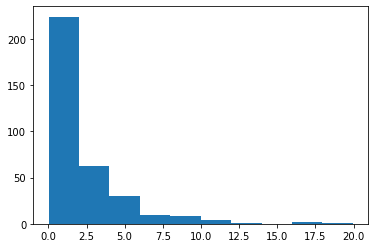

In [18]:
import matplotlib.pyplot as plt
plt.hist(cadd_list)
plt.show()

In [31]:
donor_mt_noref.filter_rows(donor_mt_noref.vep.variant_class == 'SNV').count_rows()

290

In [46]:
sites_table = hl.read_table('gs://gcp-public-data--gnomad/release/3.1.2/ht/genomes/gnomad.genomes.v3.1.2.sites.ht')

In [51]:
sites_table.describe()

----------------------------------------
Global fields:
    'freq_meta': array<dict<str, str>> 
    'freq_index_dict': dict<str, int32> 
    'faf_index_dict': dict<str, int32> 
    'faf_meta': array<dict<str, str>> 
    'vep_version': str 
    'vep_csq_header': str 
    'dbsnp_version': str 
    'filtering_model': struct {
        model_name: str, 
        score_name: str, 
        snv_cutoff: struct {
            bin: float64, 
            min_score: float64
        }, 
        indel_cutoff: struct {
            bin: float64, 
            min_score: float64
        }, 
        model_id: str, 
        snv_training_variables: array<str>, 
        indel_training_variables: array<str>
    } 
    'age_distribution': struct {
        bin_edges: array<float64>, 
        bin_freq: array<int32>, 
        n_smaller: int32, 
        n_larger: int32
    } 
    'freq_sample_count': array<int32> 
----------------------------------------
Row fields:
    'locus': locus<GRCh38> 
    'alleles': array<s

In [53]:
donor_mt_noref = donor_mt_noref.annotate_rows(af=sites_table[donor_mt_noref.row_key].popmax.AF)

In [54]:
donor_mt_noref.entries().show()

KeyboardInterrupt: 

In [ ]:
maf_list = donor_mt_noref....collect()

In [25]:
maf_list[0:10]

[0.5, 0.5, 0.5, 1.0, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

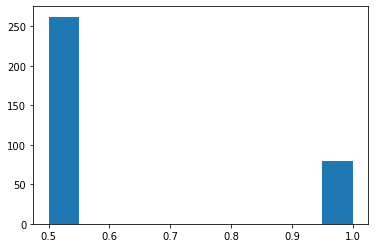

In [26]:
dp_hist = donor_mt_noref.aggregate_entries(hl.expr.aggregators.hist(donor_mt_noref.cadd.PHRED, 0, 30, 30))
p = hl.plot.histogram(dp_hist, legend='CADD score', title='CADD score Histogram')
show(p)

FatalError: OutOfMemoryError: GC overhead limit exceeded

Java stack trace:
java.lang.OutOfMemoryError: GC overhead limit exceeded
	at scala.collection.immutable.List.map(List.scala:290)
	at is.hail.relocated.org.json4s.MonadicJValue.rec$4(MonadicJValue.scala:179)
	at is.hail.relocated.org.json4s.MonadicJValue.$anonfun$mapField$2(MonadicJValue.scala:180)
	at is.hail.relocated.org.json4s.MonadicJValue$$Lambda$1437/505056770.apply(Unknown Source)
	at scala.collection.immutable.List.map(List.scala:290)
	at is.hail.relocated.org.json4s.MonadicJValue.rec$4(MonadicJValue.scala:180)
	at is.hail.relocated.org.json4s.MonadicJValue.$anonfun$mapField$1(MonadicJValue.scala:179)
	at is.hail.relocated.org.json4s.MonadicJValue$$Lambda$1436/99548133.apply(Unknown Source)
	at scala.collection.immutable.List.map(List.scala:290)
	at is.hail.relocated.org.json4s.MonadicJValue.rec$4(MonadicJValue.scala:179)
	at is.hail.relocated.org.json4s.MonadicJValue.mapField(MonadicJValue.scala:183)
	at is.hail.relocated.org.json4s.MonadicJValue.transformField(MonadicJValue.scala:196)
	at is.hail.rvd.AbstractRVDSpec$.read(AbstractRVDSpec.scala:48)
	at is.hail.expr.ir.RVDComponentSpec.rvdSpec(AbstractMatrixTableSpec.scala:110)
	at is.hail.expr.ir.TableNativeReader.rowAndGlobalPTypes(TableIR.scala:984)
	at is.hail.expr.ir.Requiredness.analyzeTable(Requiredness.scala:311)
	at is.hail.expr.ir.Requiredness.analyze(Requiredness.scala:297)
	at is.hail.expr.ir.Requiredness.run(Requiredness.scala:95)
	at is.hail.expr.ir.Requiredness$.apply(Requiredness.scala:18)
	at is.hail.expr.ir.Requiredness$.apply(Requiredness.scala:23)
	at is.hail.expr.ir.Analyses$.apply(Analyses.scala:7)
	at is.hail.expr.ir.lowering.LowerToCDA$.apply(LowerToCDA.scala:16)
	at is.hail.expr.ir.lowering.LowerToDistributedArrayPass.transform(LoweringPass.scala:77)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.evaluate$1(LowerOrInterpretNonCompilable.scala:27)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.rewrite$1(LowerOrInterpretNonCompilable.scala:67)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.rewrite$1(LowerOrInterpretNonCompilable.scala:53)
	at is.hail.expr.ir.LowerOrInterpretNonCompilable$.apply(LowerOrInterpretNonCompilable.scala:72)
	at is.hail.expr.ir.lowering.LowerOrInterpretNonCompilablePass$.transform(LoweringPass.scala:69)
	at is.hail.expr.ir.lowering.LoweringPass.$anonfun$apply$3(LoweringPass.scala:16)
	at is.hail.expr.ir.lowering.LoweringPass$$Lambda$1508/129123242.apply(Unknown Source)
	at is.hail.utils.ExecutionTimer.time(ExecutionTimer.scala:81)
	at is.hail.expr.ir.lowering.LoweringPass.$anonfun$apply$1(LoweringPass.scala:16)



Hail version: 0.2.97-937922d7f46c
Error summary: OutOfMemoryError: GC overhead limit exceeded

In [24]:
# original_mt = mt

In [35]:
from hail_scripts.computed_fields.vep import (
    get_expr_for_vep_sorted_transcript_consequences_array as vep_array,
    get_expr_for_vep_transcript_ids_set as vep_set,
    get_expr_for_worst_transcript_consequence_annotations_struct as worst_csq,
    get_expr_for_vep_consequence_terms_set as vep_csq_set,
    get_expr_for_vep_gene_ids_set as vep_gene_id_set,
    get_expr_for_vep_protein_domains_set_from_sorted as vep_prot,
)

ModuleNotFoundError: No module named 'hail_scripts'

In [34]:
mt = donor_mt
mt = mt.annotate_rows(
        domains=vep_prot(mt.sortedTranscriptConsequences),
        transcriptConsequenceTerms=vep_csq_set(mt.sortedTranscriptConsequences),
        transcriptIds=vep_set(mt.sortedTranscriptConsequences),
        mainTranscript=worst_csq(mt.sortedTranscriptConsequences),
        geneIds=vep_gene_id_set(mt.sortedTranscriptConsequences),
        codingGeneIds=vep_gene_id_set(
            mt.sortedTranscriptConsequences, only_coding_genes=True
        ),
        cadd=mt.ref_data.cadd,
        dbnsfp=mt.ref_data.dbnsfp,
        geno2mp=mt.ref_data.geno2mp,
        gnomad_exomes=mt.ref_data.gnomad_exomes,
        gnomad_exome_coverage=mt.ref_data.gnomad_exome_coverage,
        gnomad_genomes=mt.ref_data.gnomad_genomes,
        gnomad_genome_coverage=mt.ref_data.gnomad_genome_coverage,
        eigen=mt.ref_data.eigen,
        exac=mt.ref_data.exac,
        g1k=mt.ref_data.g1k,
        mpc=mt.ref_data.mpc,
        primate_ai=mt.ref_data.primate_ai,
        splice_ai=mt.ref_data.splice_ai,
        topmed=mt.ref_data.topmed,
        clinvar=hl.struct(
            **{
                'allele_id': mt.clinvar_data.info.ALLELEID,
                'clinical_significance': hl.delimit(mt.clinvar_data.info.CLNSIG),
                'gold_stars': mt.clinvar_data.gold_stars,
            }
        ),
    )

NameError: name 'vep_prot' is not defined